In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as data
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import streamlit as st

In [211]:
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

In [137]:
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [142]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-26,28.983425,29.010351,28.750067,28.813890,28.781139,32793789
2014-08-27,28.784472,28.845304,28.427103,28.471830,28.439468,34067276
2014-08-28,28.400028,28.584023,28.277365,28.382076,28.349815,25858801
2014-08-29,28.488285,28.523687,28.275820,28.501747,28.469351,21675347
2014-09-02,28.514214,28.812395,28.481304,28.787464,28.754742,31568434


In [139]:
google_data.shape

(2516, 6)

In [140]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-08-26 to 2024-08-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [143]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing price of Google data')

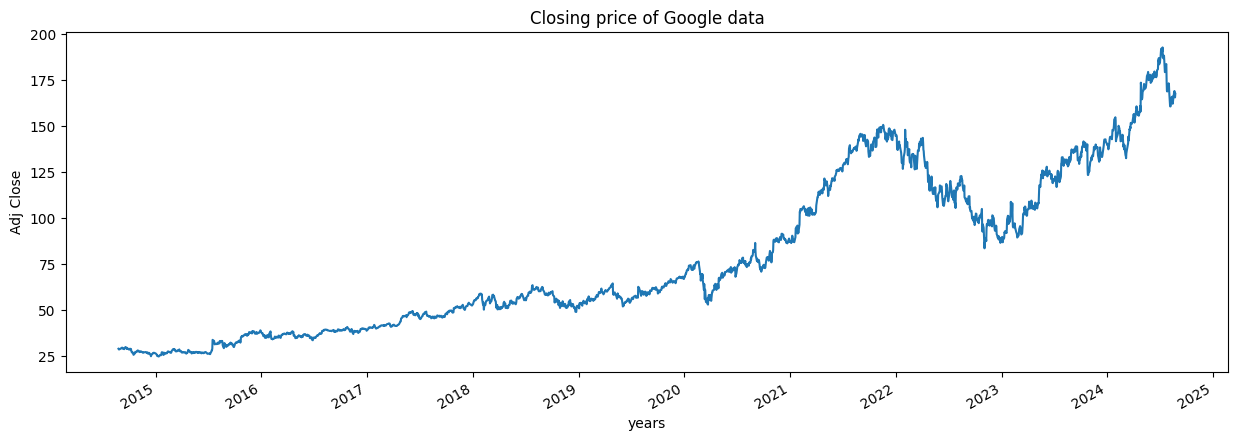

In [43]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [70]:
def plot_graph(figsize, values, column_name):
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.show() 

In [71]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

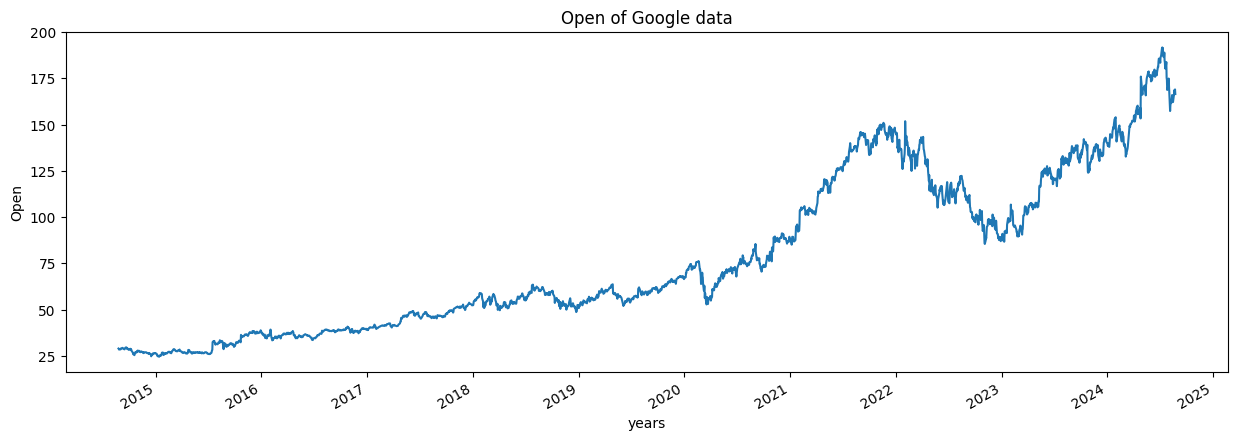

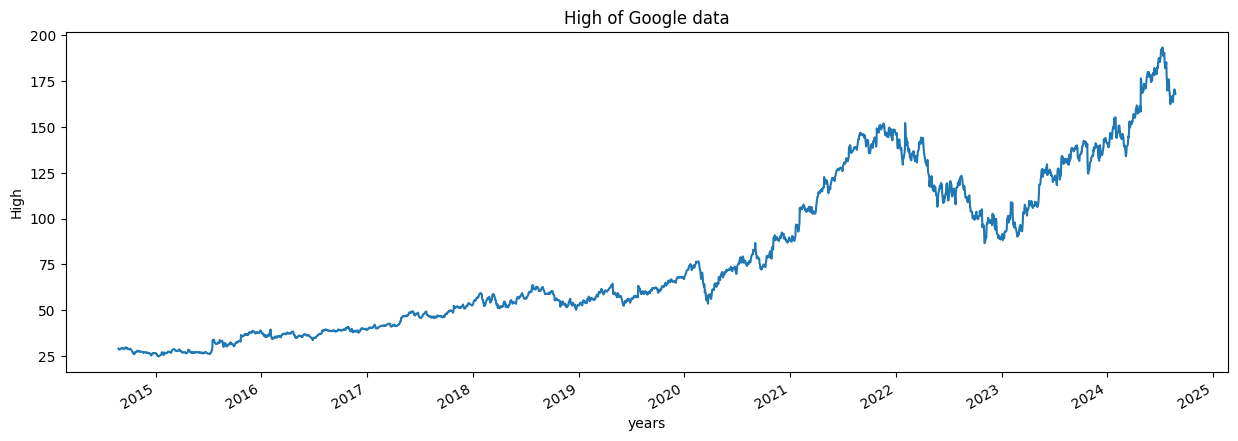

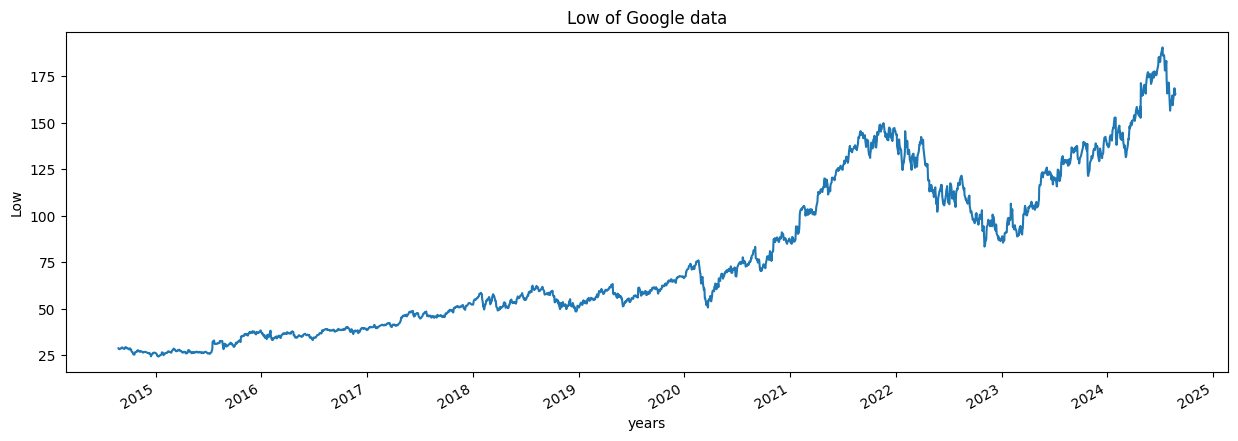

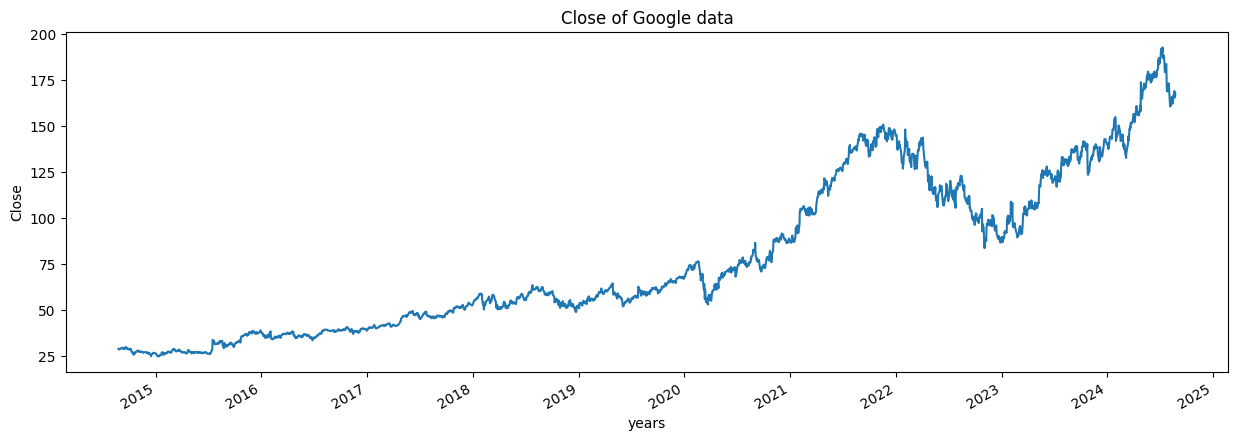

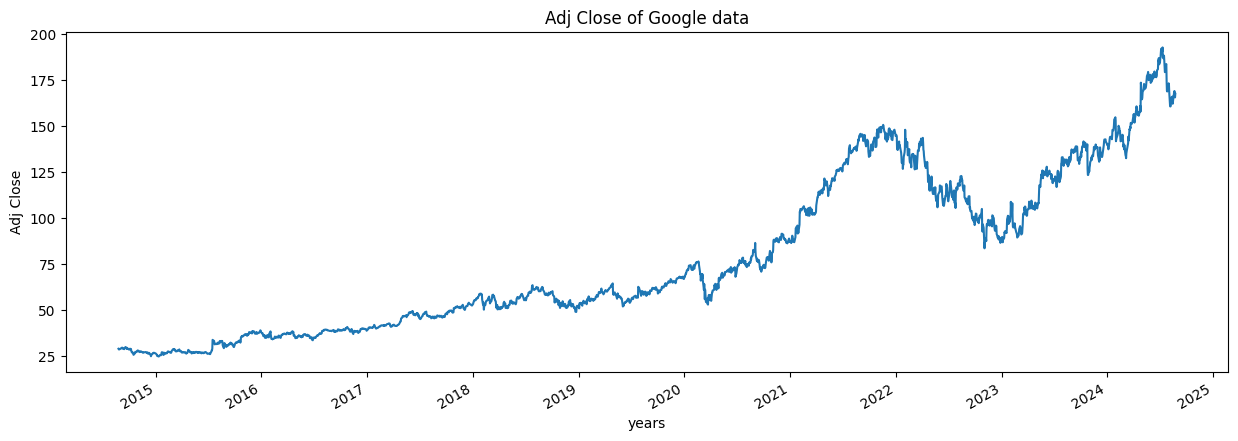

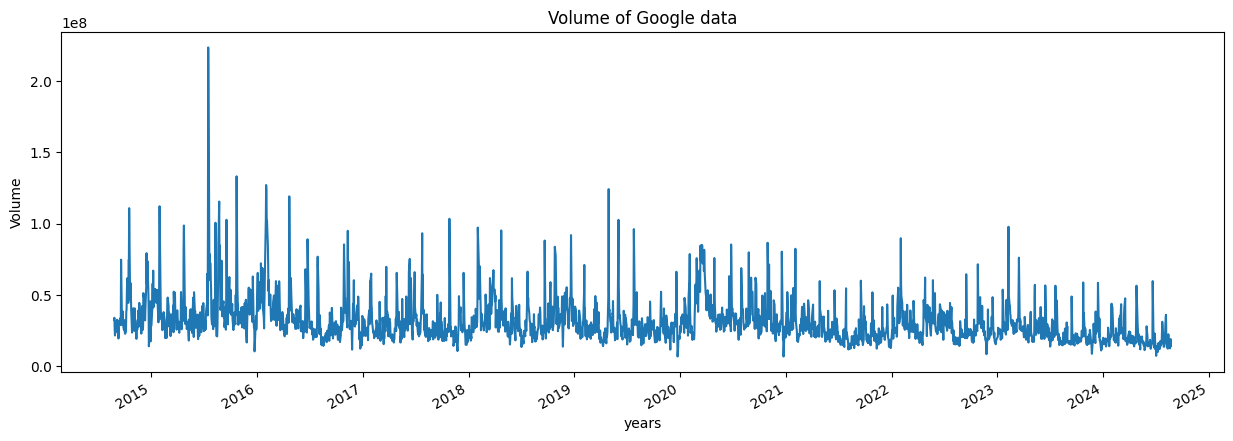

In [72]:
for column in google_data.columns:
    plot_graph((15, 5), google_data[column], column)

MA for 5 days ==> null 

In [73]:
temp_data = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[:5])/5)

30.0


So the moving average of 5th day is 30

In [76]:
temp_data = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:6])/5)

40.0


So the moving average of 6th day is 40

In [77]:
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [86]:
# Compute the rolling mean for all columns with a window of 5
rolling_means = data.rolling(5).mean()

# Add each rolling mean column to the original DataFrame with a suffix '_MA'
for column in rolling_means.columns:
    data[str(column) + '_MA'] = rolling_means[column]


In [87]:
data

,0,MA,0_MA,MA_MA
0,10,NaN,NaN,NaN
1,20,NaN,NaN,NaN
2,30,NaN,NaN,NaN
3,40,NaN,NaN,NaN
4,50,30.0,30.0,NaN
5,60,40.0,40.0,NaN
6,70,50.0,50.0,NaN
7,80,60.0,60.0,NaN
8,90,70.0,70.0,50.0
9,100,80.0,80.0,60.0


In [100]:
for i in range(2004,2004):
    print(i,list(google_data.index.year).count(i))

In [101]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [102]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-08-17          NaN
2015-08-18          NaN
2015-08-19          NaN
2015-08-20          NaN
2015-08-21    27.555249
Name: MA_for_250_days, dtype: float64

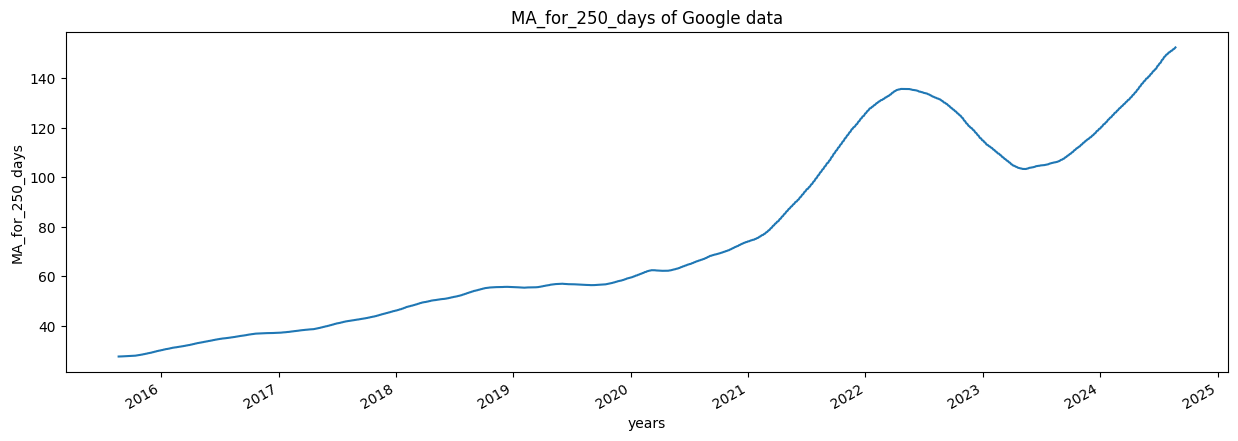

In [103]:
plot_graph((15,5),google_data['MA_for_250_days'],'MA_for_250_days')

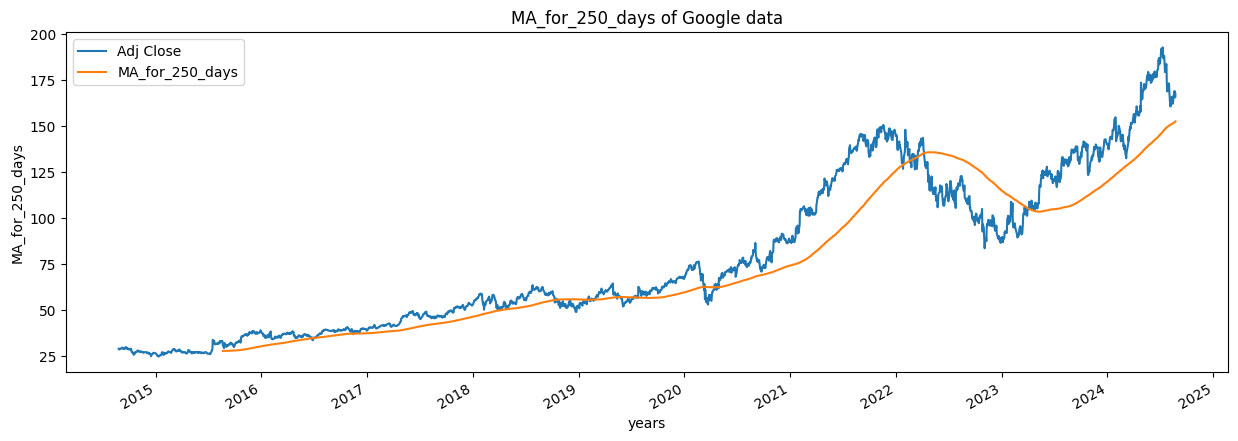

In [107]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

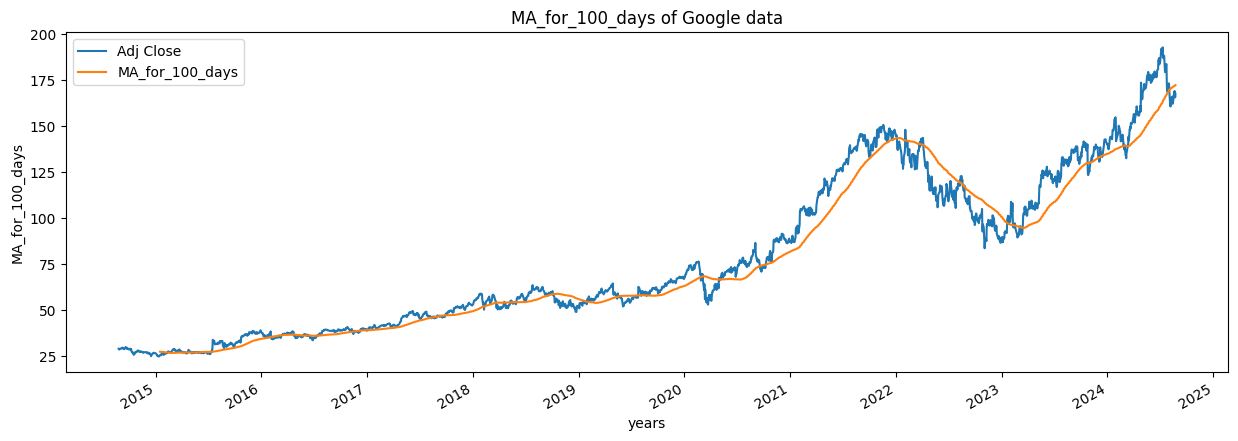

In [108]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

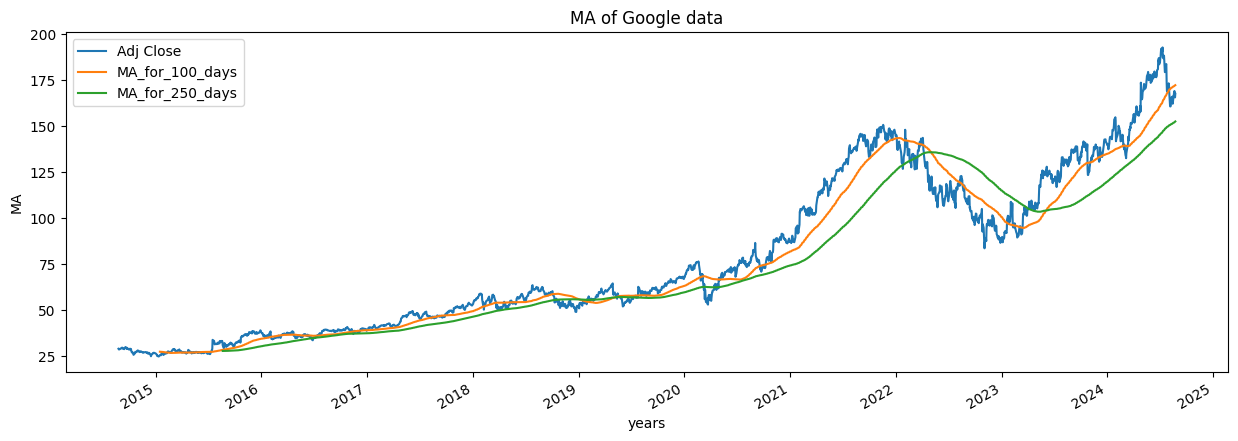

In [109]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

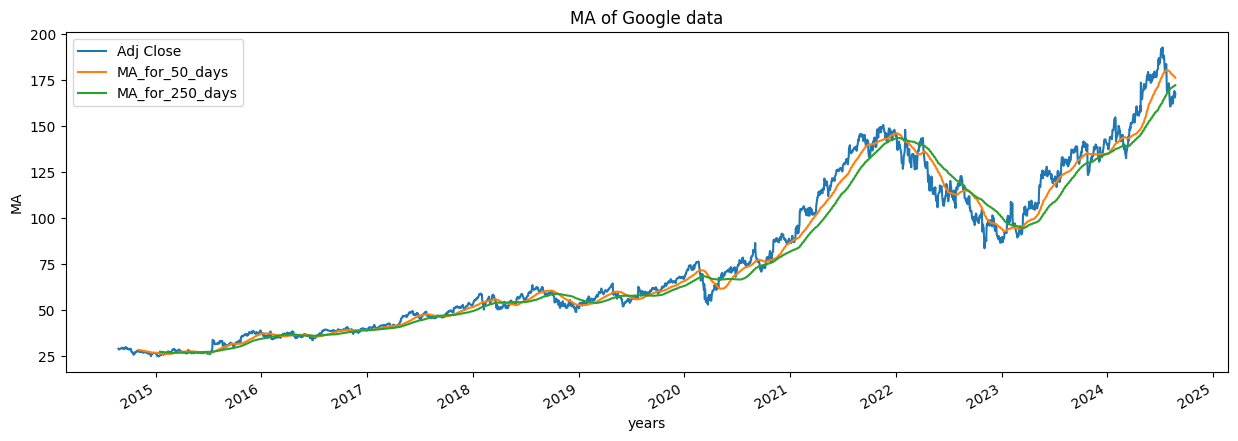

In [120]:
google_data['MA_for_50_days'] = google_data['Adj Close'].rolling(50).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_50_days','MA_for_250_days']],'MA')

In [124]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-08-26,28.781139,NaN
2014-08-27,28.439468,-0.011871
2014-08-28,28.349815,-0.003152
2014-08-29,28.469351,0.004216
2014-09-02,28.754742,0.010024


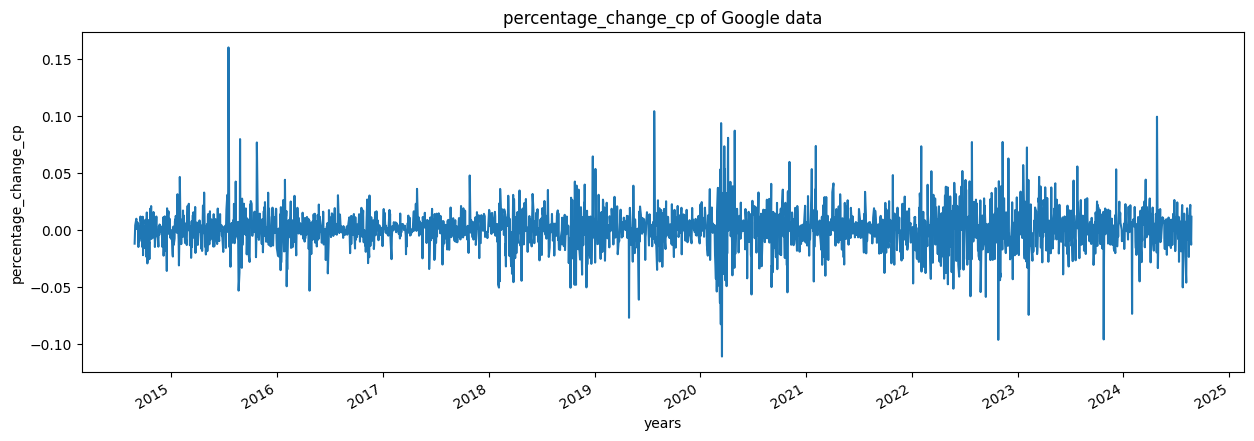

In [126]:
 plot_graph((15,5),google_data['percentage_change_cp'],'percentage_change_cp')

In [127]:
Adj_close_price = google_data[['Adj Close']]

In [133]:
max_value = google_data['Adj Close'].max()
min_value = google_data['Adj Close'].min()

print(max_value, min_value)

192.66000366210938 24.532154083251953


In [144]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.02527235],
       [0.02324014],
       [0.02270689],
       ...,
       [0.85112521],
       [0.8383968 ],
       [0.84993556]])

In [145]:
len(scaled_data)

2516

In [164]:
x_data = []
y_data = []

# Assuming you want a rolling window of 100 for x_data and a single value for y_data
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])  # Appending slices of length 100
    y_data.append(scaled_data[i])        # Appending a single value

# Convert to NumPy arrays
x_data = np.array(x_data)
y_data = np.array(y_data)


In [165]:
x_data[0],y_data[0]

(array([[0.02527235],
        [0.02324014],
        [0.02270689],
        [0.02341787],
        [0.02511534],
        [0.02529605],
        [0.02649286],
        [0.02770745],
        [0.02878577],
        [0.02620551],
        [0.02682466],
        [0.02630623],
        [0.02460877],
        [0.02386224],
        [0.02589149],
        [0.02731937],
        [0.02865247],
        [0.03066986],
        [0.0280896 ],
        [0.02624106],
        [0.02827327],
        [0.02444287],
        [0.0250472 ],
        [0.02482799],
        [0.02512423],
        [0.0224314 ],
        [0.02296759],
        [0.02450805],
        [0.02512127],
        [0.02108941],
        [0.0236845 ],
        [0.02024217],
        [0.01538677],
        [0.01204517],
        [0.0134464 ],
        [0.01110313],
        [0.00946787],
        [0.00551601],
        [0.00838067],
        [0.01006925],
        [0.01189705],
        [0.01523569],
        [0.01399148],
        [0.01428476],
        [0.0166932 ],
        [0

In [170]:
int(len(x_data)*0.7)

1691

In [171]:
4908-100-int(len(x_data)*0.7)

3117

In [173]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [174]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1691, 100, 1)
(1691, 1)
(725, 100, 1)
(725, 1)


In [203]:
import numpy as np

timesteps = 100

x_data, y_data = [], []

for i in range(timesteps, len(scaled_data)):
    x_data.append(scaled_data[i - timesteps:i])  
    y_data.append(scaled_data[i])              

x_data, y_data = np.array(x_data), np.array(y_data)

if x_data.ndim == 2:  
    x_data = np.expand_dims(x_data, axis=-1)

print(x_data.shape)  
print(y_data.shape)  

(2416, 100, 1)
(2416, 1)


In [204]:
# Corrected model.compile statement
model.compile(optimizer='adam', loss='mean_squared_error')

In [205]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 512 (2.00 KB)

 Trainable params: 512 (2.00 KB)

 Non-trainable params: 0 (0.00 B)